<a href="https://colab.research.google.com/github/sandeeprairai/Feature-Engineering/blob/main/handling_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Finding and visualizing missing values

In [ ]:
import pandas as pd

#  Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')


In [ ]:
missing_values_count=df.isnull().sum()

# Print the number of missing values for each column
print("Number f missing values in each column:")
print(missing_values_count)

Number f missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# if you want to see the percentage of miising values in each column
missing_values_percentage=(df.isnull().sum()/ len(df))*100
print("/nPercentage of missing values in each column:")
print(missing_values_percentage)

/nPercentage of missing values in each column:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [ ]:
# To get a quick overview of total missing values in the dataset
total_missing_values = df.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing_values}")


Total missing values in the dataset: 866


In [ ]:
# Chek for any rows that missing values
rows_with_missing_values=df[df.isnull().any(axis=1)]
print("\nRows with missing values:")
rows_with_missing_values


Rows with missing values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### missinggo for missing values

In [ ]:
!pip install missingno

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andymcdgeo/Andys_YouTube_Notebooks/main/Data/xeek_subset2.csv')
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,PEF,DTC,SP,DTS,DCAL,DRHO,ROPA,RXO,LITHOFACIES,LITH_CONF
0,15/09/2013,494.528,437641.9688,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,20.915468,161.131180,24.612379,NaN,NaN,-0.574928,NaN,NaN,65000,1.0
1,15/09/2013,494.680,437641.9688,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,19.383013,160.603470,23.895531,NaN,NaN,-0.570188,NaN,NaN,65000,1.0
2,15/09/2013,494.832,437641.9688,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,22.591518,160.173615,23.916357,NaN,NaN,-0.574245,NaN,NaN,65000,1.0
3,15/09/2013,494.984,437641.9688,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,32.191910,160.149429,23.793688,NaN,NaN,-0.586315,NaN,NaN,65000,1.0
4,15/09/2013,495.136,437641.9688,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,38.495632,160.128342,24.104078,NaN,NaN,-0.597914,NaN,NaN,65000,1.0


In [ ]:
df.shape

(133198, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   WELL         133198 non-null  object 
 1   DEPTH_MD     133198 non-null  float64
 2   X_LOC        125805 non-null  float64
 3   Y_LOC        125805 non-null  float64
 4   Z_LOC        125805 non-null  float64
 5   GROUP        133198 non-null  object 
 6   FORMATION    111632 non-null  object 
 7   CALI         133006 non-null  float64
 8   RSHA         62039 non-null   float64
 9   RMED         125556 non-null  float64
 10  RDEP         125805 non-null  float64
 11  RHOB         108053 non-null  float64
 12  GR           133198 non-null  float64
 13  SGR          17350 non-null   float64
 14  NPHI         91725 non-null   float64
 15  PEF          100840 non-null  float64
 16  DTC          132635 non-null  float64
 17  SP           93680 non-null   float64
 18  DTS          12184 non-n

<Axes: >

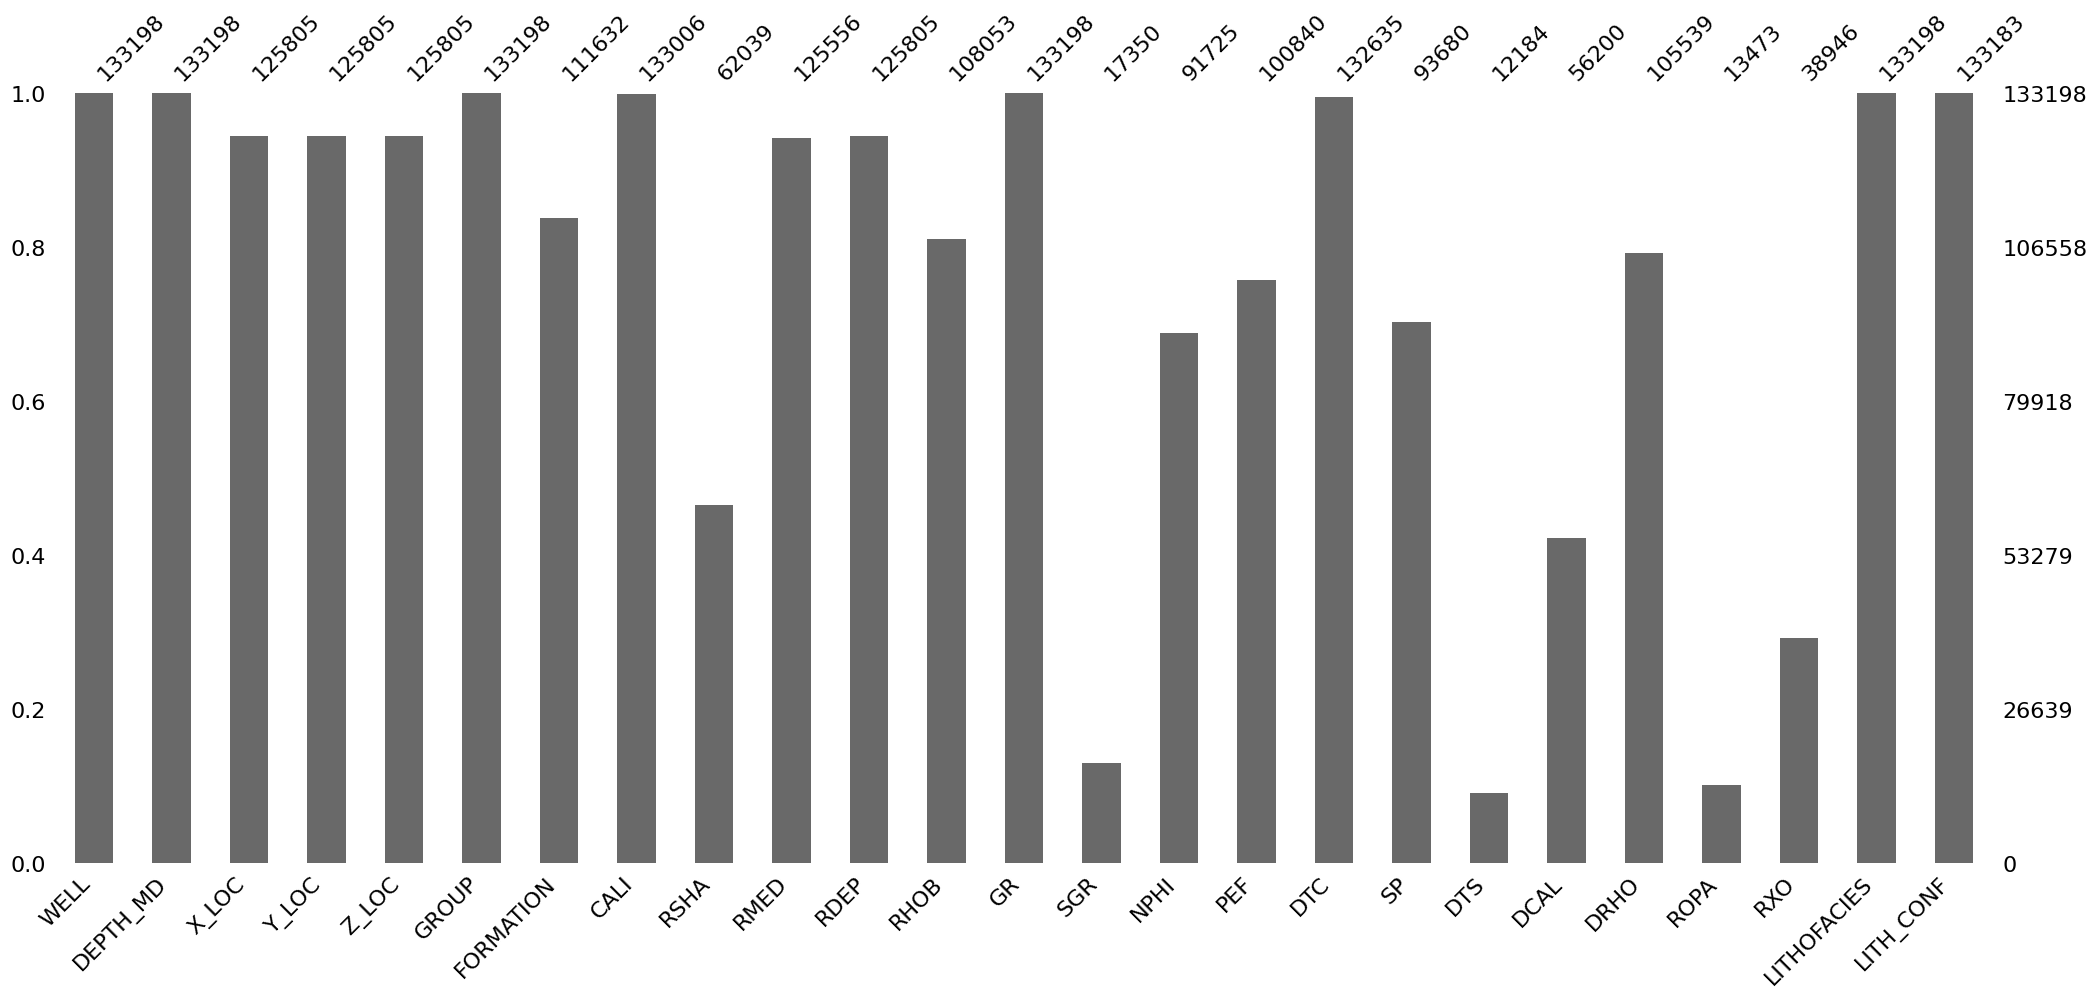

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

# bar plot to visualize missing values
msno.bar(df)

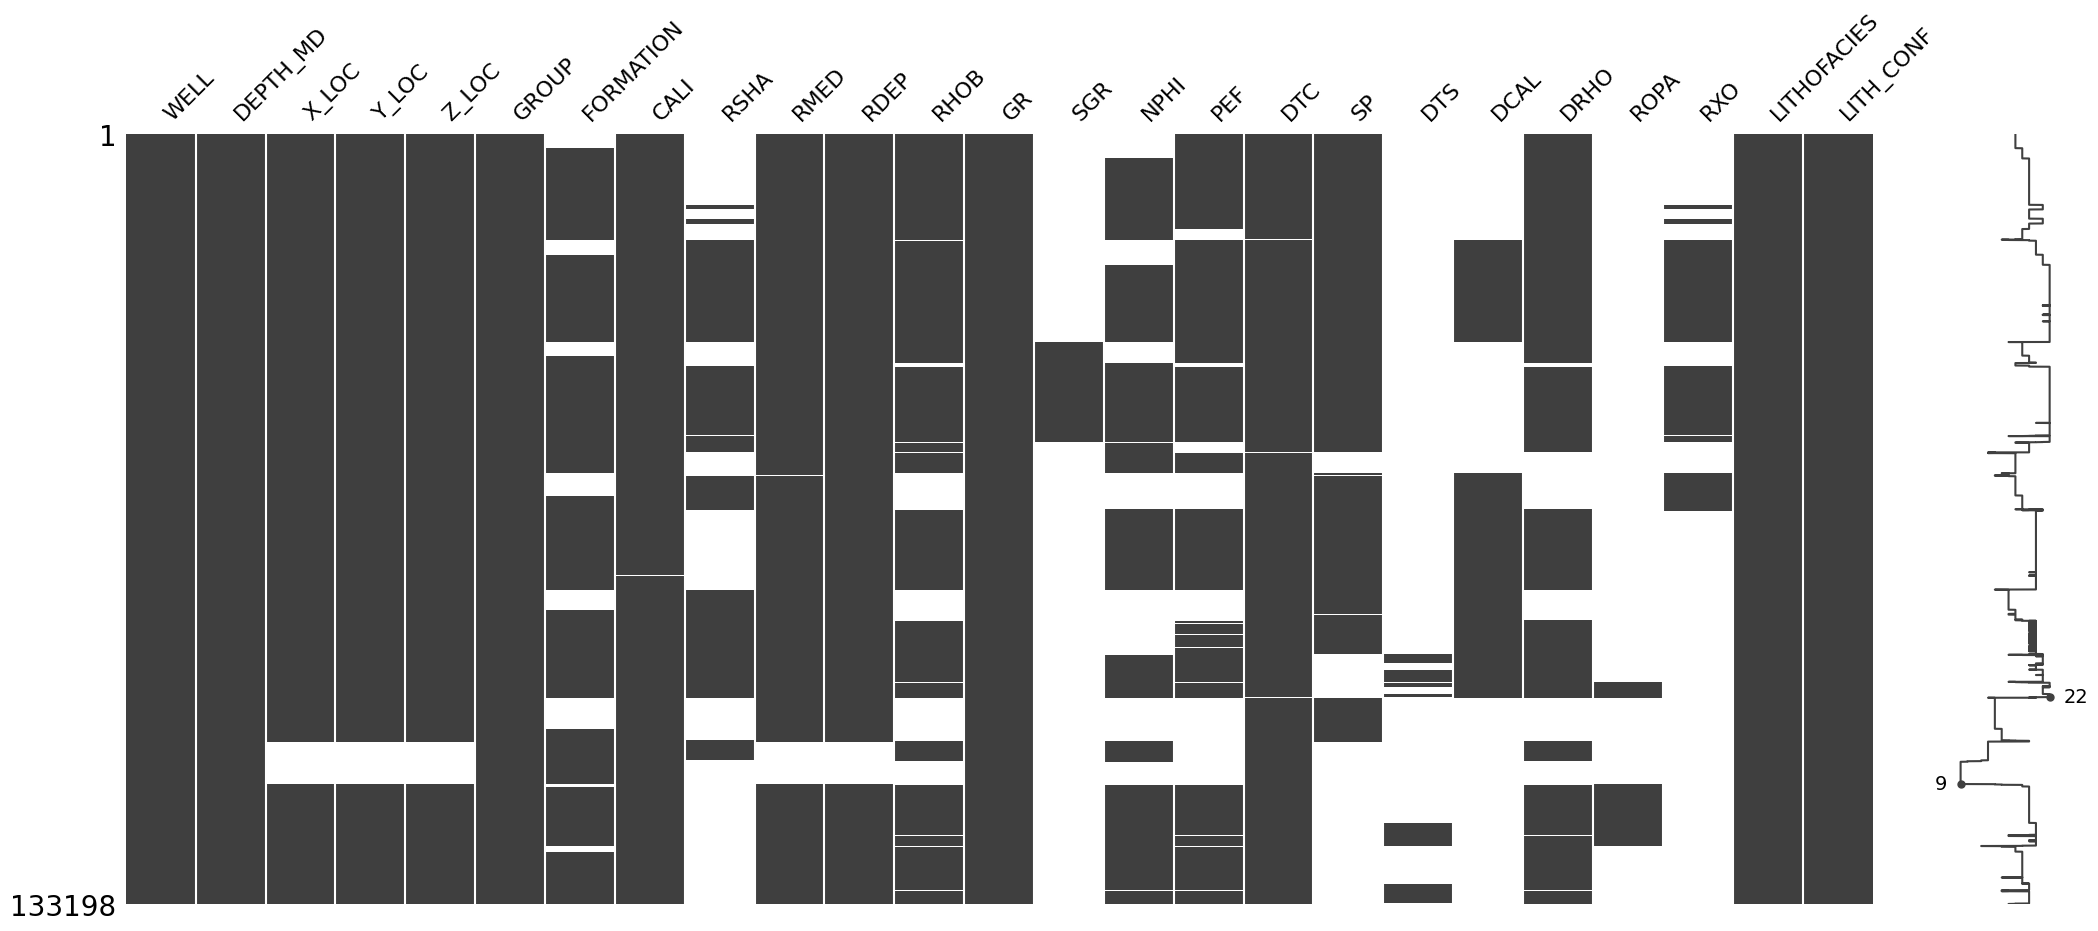

In [ ]:
#  Matrix Chart to visualize  missing values
msno.matrix(df)
plt.show()

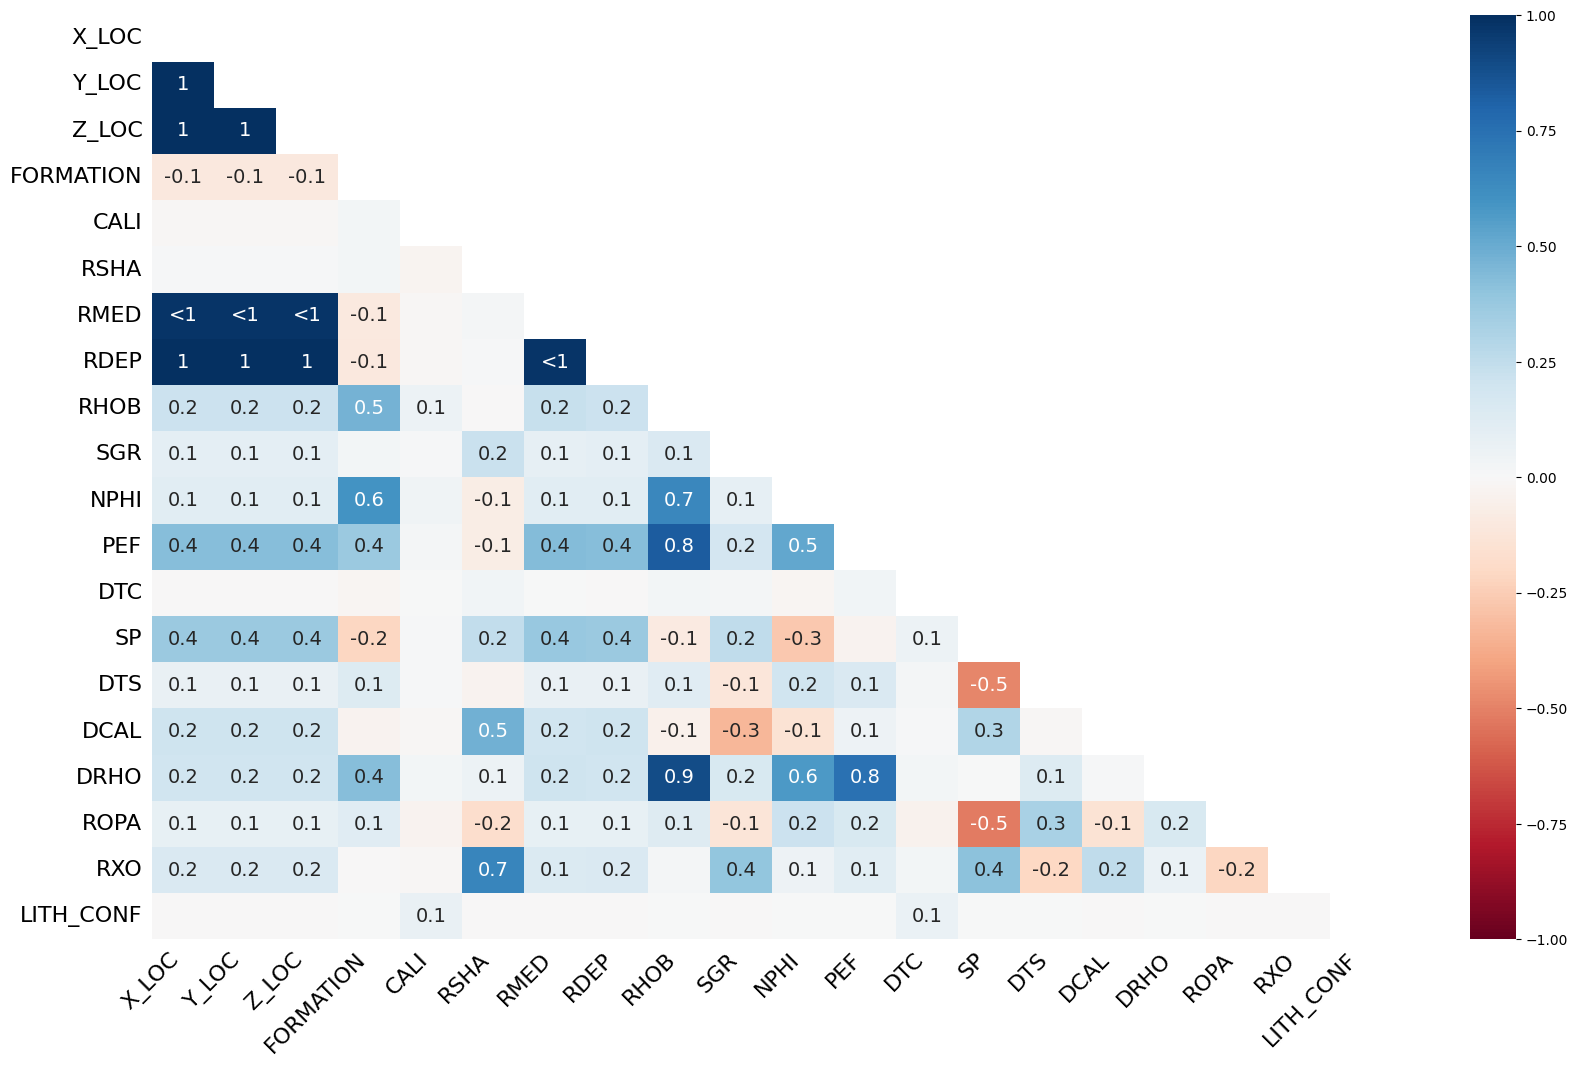

In [ ]:
# Heatmap to visualize the correlation of missingness between columns
msno.heatmap(df)
plt.show()

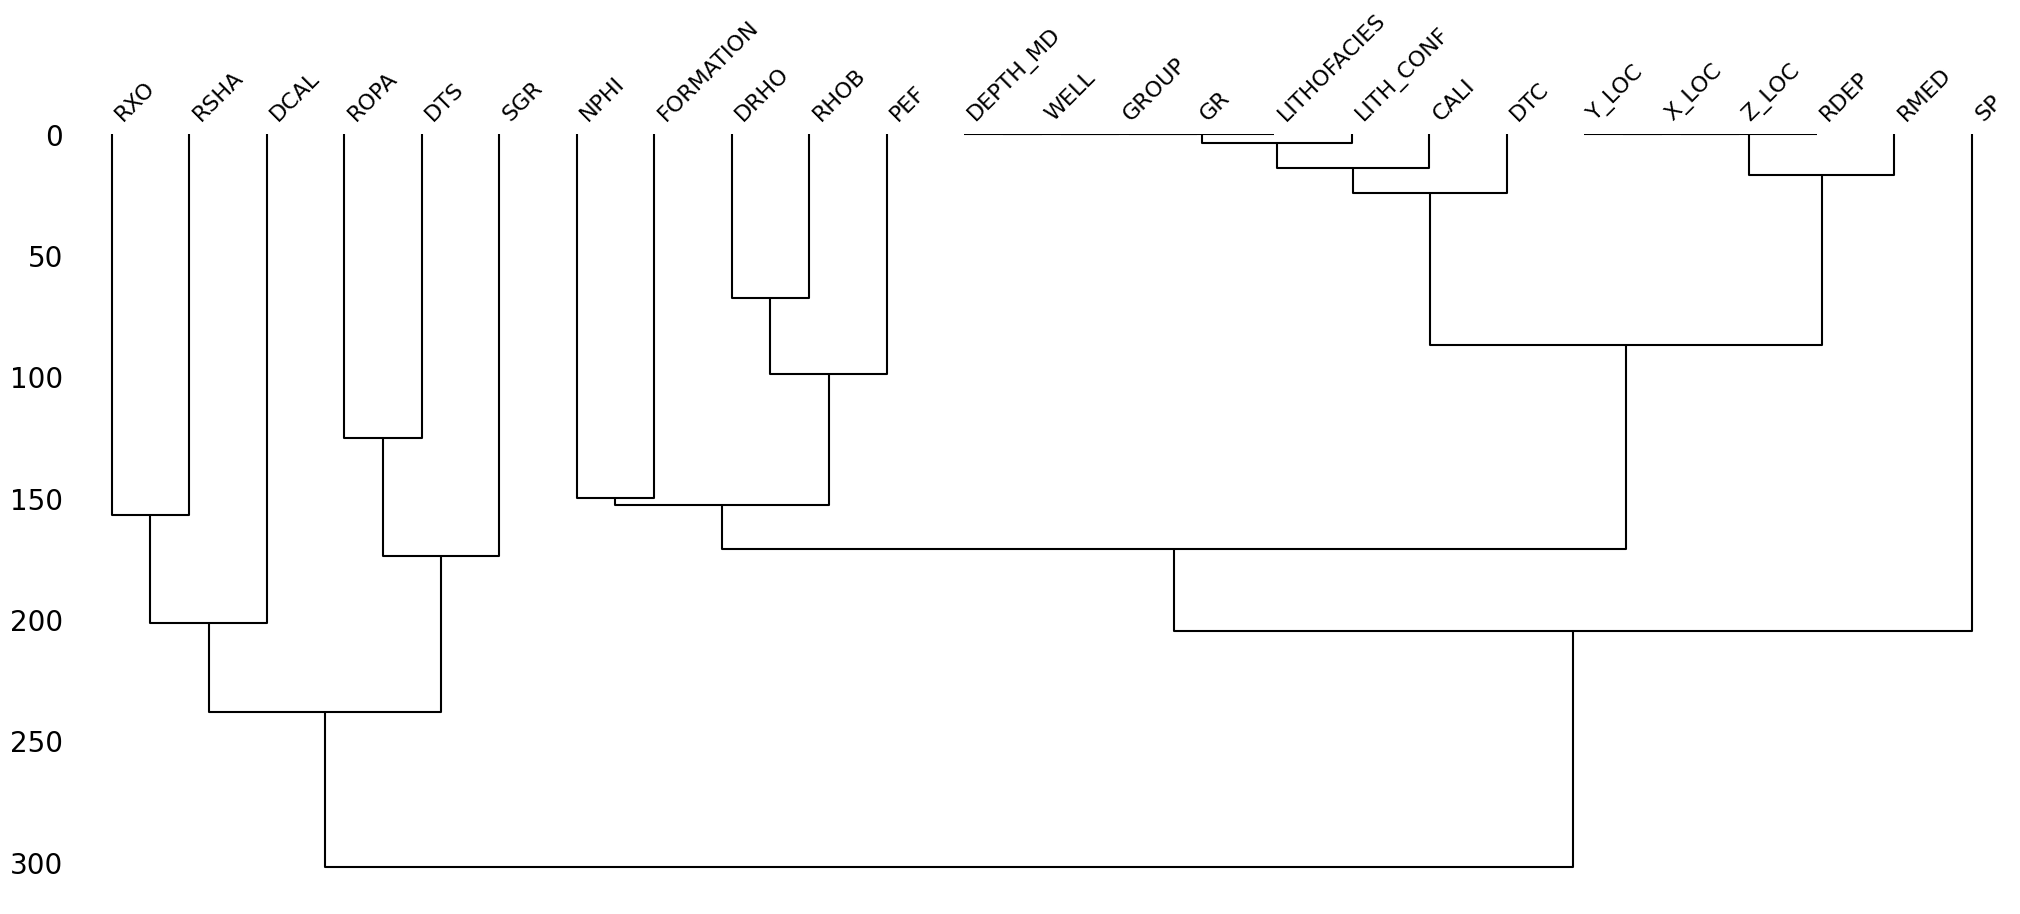

In [ ]:
# Dendogram to visualuize the hierarchical clustering of missing values
msno.dendrogram(df)
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
data = np.random.randn(100, 3)  # 100 rows, 3 columns

# Artificially introduce missing values completely at random in the first column
missing_indices = np.random.choice(np.arange(100), size=20, replace=False)
data[missing_indices, 0] = np.nan

# Create a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3'])

df.head()

,Feature1,Feature2,Feature3
0,0.496714,-0.138264,0.647689
1,1.523030,-0.234153,-0.234137
2,NaN,0.767435,-0.469474
3,0.542560,-0.463418,-0.465730
4,0.241962,-1.913280,-1.724918


In [ ]:
df.shape

(100, 3)

In [ ]:
# Split the data into two groups
missing_data=df[df['Feature1'].isnull()]
not_missing_data=df[~df['Feature1'].isnull()]

# calculate the means
means_missing=missing_data.mean()
means_not_missing=not_missing_data.mean()

# Print the means for comparison
print("Means with missing data:\n",means_missing)
print("\nMeans without missing data:\n",means_not_missing)

Means with missing data:
 Feature1         NaN
Feature2   -0.464175
Feature3    0.082040
dtype: float64

Means without missing data:
 Feature1    0.058190
Feature2   -0.112998
Feature3    0.073017
dtype: float64


In [ ]:
not_missing_data.shape

(80, 3)